In [26]:
import pandas as pd
import shapefile

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize

import geopandas as gpd
from scipy.spatial import cKDTree
import numpy as np
from numpy import *
from mpl_toolkits.basemap import Basemap
from netCDF4 import *

In [27]:
df = pd.read_csv('/home/ubuntu/year3/data_visualisation/ibtracs-2000.csv')
df

/tmp/ipykernel_4015/3580645859.py:1: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/ubuntu/year3/data_visualisation/ibtracs-2000.csv')


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 06:00:00,TS,19.6000,-94.6000,...,,,,,,,,,1,344
2,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 09:00:00,TS,19.6500,-94.6000,...,,,,,,,,,1,0
3,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 12:00:00,TS,19.7000,-94.6000,...,,,,,,,,,1,344
4,1999231N20266,1999,65,NaN,GM,BRET,1999-08-19 15:00:00,TS,19.7575,-94.6500,...,,,,,,,,,1,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8928,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 00:00:00,TS,-18.5,54.2,...,,,,,,,,,9,211
8929,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 03:00:00,TS,-18.9258,53.9683,...,,,,,,,,,10,205
8930,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 06:00:00,TS,-19.3667,53.7667,...,,,,,,,,,9,202
8931,2000366S09068,2001,114,SI,MM,ANDO,2001-01-06 09:00:00,TS,-19.7741,53.6115,...,,,,,,,,,9,199


In [7]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])

# Filter for season 2000 and then get the first occurrence of each day
filtered_df = df[df['SEASON'] == 2000]
filtered_df = filtered_df.sort_values('ISO_TIME').groupby(filtered_df['ISO_TIME'].dt.date).first().reset_index(drop=True)

/tmp/ipykernel_4015/1693759851.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])


DateParseError: Unable to parse datetime string:  , at position 0

In [12]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'], errors='coerce')

# Drop rows where 'iso_time' could not be parsed (NaT values)
df = df.dropna(subset=['ISO_TIME'])

# Filter for season 2000 and get the first occurrence of each day
filtered_df = df[df['SEASON'] == 2000]
filtered_df = filtered_df.sort_values('ISO_TIME').groupby(df['ISO_TIME'].dt.to_period('M')).first().reset_index(drop=True)
filtered_df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,2000099S28037,2000,24,SI,MM,NOT_NAMED,2000-04-10 00:00:00,SS,-25.3,37.5,...,,,,,,,,,5,58
1,2000125N06136,2000,29,WP,MM,DAMREY,2000-05-03 18:00:00,TS,6.2,135.7,...,,,,,,,,,12,344
2,2000150N11117,2000,35,WP,MM,NOT_NAMED,2000-06-01 00:00:00,TS,16.15,108.9,...,,,,,,,,,10,316
3,2000184N13133,2000,41,WP,MM,KIROGI,2000-07-02 00:00:00,TS,13.1,133.4,...,,,,,,,,,6,321
4,2000205N10260,2000,50,EP,CP,DANIEL,2000-08-01 00:00:00,TS,21.825,-154.5,...,,,,,,,,,8,308
5,2000244N13229,2000,74,EP,MM,KRISTY,2000-09-01 00:00:00,TS,13.7,-133.2,...,,,,,,,,,2,336
6,2000273N16277,2000,91,EP,CS,KEITH,2000-10-01 00:00:00,TS,17.9,-86.9,...,,,,,,,,,2,270
7,2000305N06136,2000,103,WP,MM,BEBINCA,2000-11-01 00:00:00,TS,10.575,129.1,...,,,,,,,,,11,308
8,2000331N09092,2000,107,NI,AS,NOT_NAMED,2000-12-01 00:00:00,TS,11.5,75.1,...,,,,,,,,,6,274
9,2000364N07130,2000,113,WP,MM,SOULIK,2001-01-01 00:00:00,TS,14.8,131.625,...,,,,,,,,,10,66


/tmp/ipykernel_4015/2574422633.py:8: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_data = pd.read_csv(file_path)


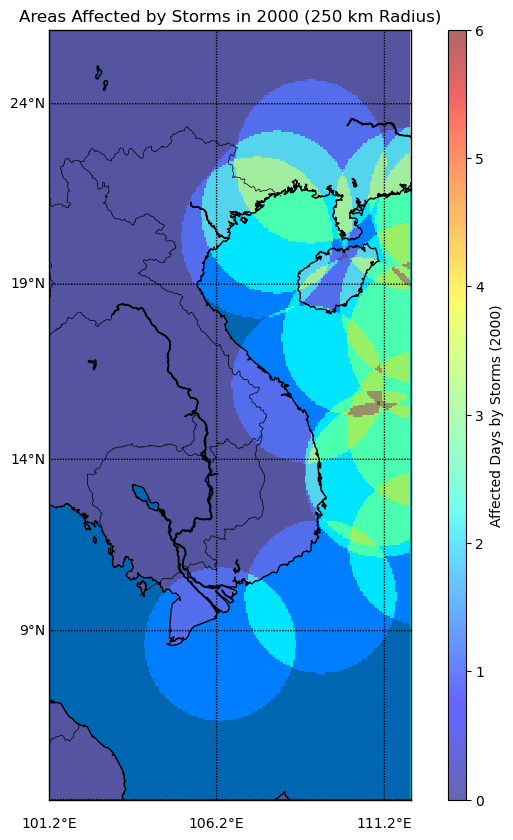

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data
file_path = '/home/ubuntu/year3/data_visualisation/ibtracs-2000.csv'
storm_data = pd.read_csv(file_path)

# Filter for the year 2000 and convert LAT and LON columns to numeric
storm_data = storm_data[storm_data['SEASON'] == 2000]
storm_data['LAT'] = pd.to_numeric(storm_data['LAT'], errors='coerce')
storm_data['LON'] = pd.to_numeric(storm_data['LON'], errors='coerce')
storm_data.dropna(subset=['LAT', 'LON'], inplace=True)

# Convert ISO_TIME to datetime and extract date
storm_data['ISO_TIME'] = pd.to_datetime(storm_data['ISO_TIME'])
storm_data['DATE'] = storm_data['ISO_TIME'].dt.date

# Get the first timestamp for each day
first_storms = storm_data.groupby('DATE').first().reset_index()

# Set map boundaries and grid resolution
lat_min, lat_max = 4, 26
lon_min, lon_max = 101.2, 112
lat_res, lon_res = 0.05, 0.05

# Create latitude and longitude grid
lat_grid = np.arange(lat_min, lat_max, lat_res)
lon_grid = np.arange(lon_min, lon_max, lon_res)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Initialize affected area count grid with zeros
affected_count = np.zeros_like(lon_mesh)

# Radius in degrees (250 km)
radius_deg = 250 / 111  # Approximate conversion from km to degrees

# Determine affected points for each storm's endpoint
for _, storm in first_storms.iterrows():
    end_lat = storm['LAT']
    end_lon = storm['LON']
    
    # Calculate the distance from each grid point to the storm's endpoint
    distance = np.sqrt((lat_mesh - end_lat)**2 + (lon_mesh - end_lon)**2)
    
    # Mark grid points within the 250 km radius
    affected_area = distance <= radius_deg
    affected_count += affected_area.astype(int)

# Plotting setup
plt.figure(figsize=(12, 10))
m = Basemap(projection='merc', llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgrey', lake_color='aqua')
m.drawparallels(np.arange(lat_min, lat_max, 5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(lon_min, lon_max, 5), labels=[0, 0, 0, 1])

# Plot affected areas as a heatmap using 'jet' colormap
x, y = m(lon_mesh, lat_mesh)
heatmap = m.pcolormesh(x, y, affected_count, shading='auto', cmap='jet', alpha=0.6)
cbar = m.colorbar(heatmap, location='right', pad="10%")
cbar.set_label("Affected Days by Storms (2000)")

plt.title("Areas Affected by Storms in 2000 (250 km Radius)")
plt.show()


/tmp/ipykernel_4015/2840716656.py:8: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_data = pd.read_csv(file_path)


Storms that appeared in Vietnam with the first timestamp for each day:
           DATE       NAME    LAT    LON
44   2000-06-01  NOT_NAMED  16.15  108.9
77   2000-07-18  NOT_NAMED  22.40  109.0
78   2000-07-19  NOT_NAMED  21.00  108.0
79   2000-07-20  NOT_NAMED  20.30  107.4
204  2000-12-07     RUMBIA  10.00  109.3
205  2000-12-08     RUMBIA   8.60  106.3


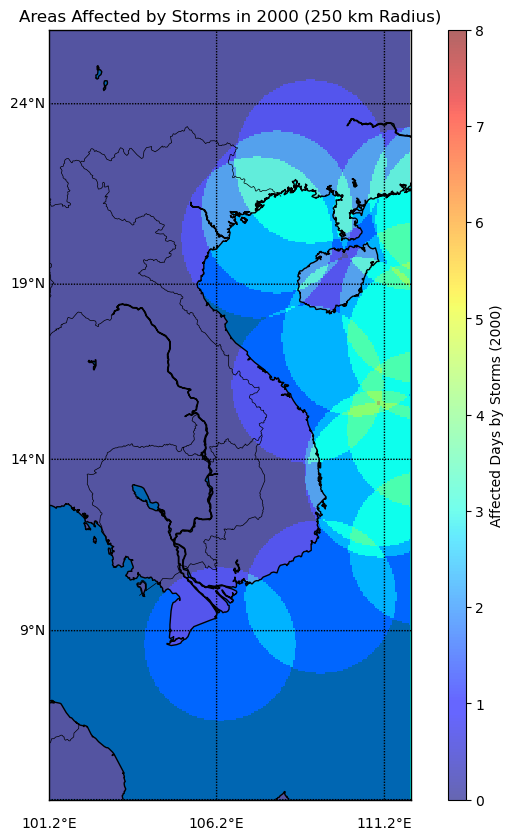

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data
file_path = '/home/ubuntu/year3/data_visualisation/ibtracs-2000.csv'
storm_data = pd.read_csv(file_path)

# Filter for the year 2000 and convert LAT and LON columns to numeric
storm_data = storm_data[storm_data['SEASON'] == 2000]
storm_data['LAT'] = pd.to_numeric(storm_data['LAT'], errors='coerce')
storm_data['LON'] = pd.to_numeric(storm_data['LON'], errors='coerce')
storm_data.dropna(subset=['LAT', 'LON'], inplace=True)

# Convert ISO_TIME to datetime and extract date
storm_data['ISO_TIME'] = pd.to_datetime(storm_data['ISO_TIME'])
storm_data['DATE'] = storm_data['ISO_TIME'].dt.date

# Get the first timestamp for each day
first_storms = storm_data.groupby('DATE').first().reset_index()

# Define Vietnam's boundaries
vietnam_lat_min = 8
vietnam_lat_max = 23
vietnam_lon_min = 102
vietnam_lon_max = 110

# Filter storms that appeared in Vietnam
vietnam_storms = first_storms[
    (first_storms['LAT'] >= vietnam_lat_min) & 
    (first_storms['LAT'] <= vietnam_lat_max) & 
    (first_storms['LON'] >= vietnam_lon_min) & 
    (first_storms['LON'] <= vietnam_lon_max)
]

# Print storms that appeared in Vietnam
print("Storms that appeared in Vietnam with the first timestamp for each day:")
print(vietnam_storms[['DATE', 'NAME', 'LAT', 'LON']])

# Set map boundaries and grid resolution
lat_min, lat_max = 4, 26
lon_min, lon_max = 101.2, 112
lat_res, lon_res = 0.05, 0.05

# Create latitude and longitude grid
lat_grid = np.arange(lat_min, lat_max, lat_res)
lon_grid = np.arange(lon_min, lon_max, lon_res)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Initialize affected area count grid with zeros
affected_count = np.zeros_like(lon_mesh)

# Radius in degrees (250 km)
radius_deg = 250 / 111  # Approximate conversion from km to degrees

# Determine affected points for each storm's endpoint
for _, storm in first_storms.iterrows():
    end_lat = storm['LAT']
    end_lon = storm['LON']
    
    # Calculate the distance from each grid point to the storm's endpoint
    distance = np.sqrt((lat_mesh - end_lat)**2 + (lon_mesh - end_lon)**2)
    
    # Mark grid points within the 250 km radius
    affected_area = distance <= radius_deg
    affected_count += affected_area.astype(int)

# Plotting setup
plt.figure(figsize=(12, 10))
m = Basemap(projection='merc', llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgrey', lake_color='aqua')
m.drawparallels(np.arange(lat_min, lat_max, 5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(lon_min, lon_max, 5), labels=[0, 0, 0, 1])

# Plot affected areas as a heatmap using 'jet' colormap
x, y = m(lon_mesh, lat_mesh)
heatmap = m.pcolormesh(x, y, affected_count, shading='auto', cmap='jet', alpha=0.6, vmin = 0, vmax = 8)
cbar = m.colorbar(heatmap, location='right', pad="10%")
cbar.set_label("Affected Days by Storms (2000)")

plt.title("Areas Affected by Storms in 2000 (250 km Radius)")
plt.show()


/tmp/ipykernel_4015/3378559102.py:8: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_data = pd.read_csv(file_path)


Storms that appeared in Vietnam with the first and last timestamps for each day:
           DATE FIRST_NAME  FIRST_LAT  FIRST_LON FIRST_TIMESTAMP  \
44   2000-06-01  NOT_NAMED      16.15      108.9      2000-06-01   
77   2000-07-18  NOT_NAMED      22.40      109.0      2000-07-18   
78   2000-07-19  NOT_NAMED      21.00      108.0      2000-07-19   
79   2000-07-20  NOT_NAMED      20.30      107.4      2000-07-20   
204  2000-12-07     RUMBIA      10.00      109.3      2000-12-07   
205  2000-12-08     RUMBIA       8.60      106.3      2000-12-08   

         LAST_TIMESTAMP  
44  2000-06-01 18:00:00  
77  2000-07-18 21:00:00  
78  2000-07-19 21:00:00  
79  2000-07-20 21:00:00  
204 2000-12-07 21:00:00  
205 2000-12-08 00:00:00  


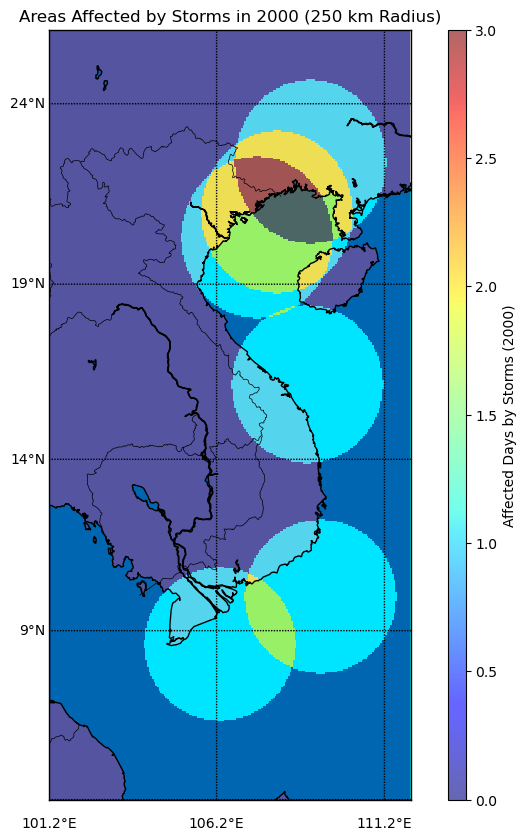

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load data
file_path = '/home/ubuntu/year3/data_visualisation/ibtracs-2000.csv'
storm_data = pd.read_csv(file_path)

# Filter for the year 2000 and convert LAT and LON columns to numeric
storm_data = storm_data[storm_data['SEASON'] == 2000]
storm_data['LAT'] = pd.to_numeric(storm_data['LAT'], errors='coerce')
storm_data['LON'] = pd.to_numeric(storm_data['LON'], errors='coerce')
storm_data.dropna(subset=['LAT', 'LON'], inplace=True)

# Convert ISO_TIME to datetime and extract date
storm_data['ISO_TIME'] = pd.to_datetime(storm_data['ISO_TIME'])
storm_data['DATE'] = storm_data['ISO_TIME'].dt.date

# Get the first and last timestamp for each day
first_last_storms = storm_data.groupby('DATE').agg({'LAT': 'first', 'LON': 'first', 'NAME': 'first', 'ISO_TIME': ['first', 'last']}).reset_index()
first_last_storms.columns = ['DATE', 'FIRST_LAT', 'FIRST_LON', 'FIRST_NAME', 'FIRST_TIMESTAMP', 'LAST_TIMESTAMP']

# Define Vietnam's boundaries
vietnam_lat_min = 8
vietnam_lat_max = 23
vietnam_lon_min = 102
vietnam_lon_max = 110

# Filter storms that appeared in Vietnam
vietnam_storms = first_last_storms[
    (first_last_storms['FIRST_LAT'] >= vietnam_lat_min) & 
    (first_last_storms['FIRST_LAT'] <= vietnam_lat_max) & 
    (first_last_storms['FIRST_LON'] >= vietnam_lon_min) & 
    (first_last_storms['FIRST_LON'] <= vietnam_lon_max)
]

# Print storms that appeared in Vietnam
print("Storms that appeared in Vietnam with the first and last timestamps for each day:")
print(vietnam_storms[['DATE', 'FIRST_NAME', 'FIRST_LAT', 'FIRST_LON', 'FIRST_TIMESTAMP', 'LAST_TIMESTAMP']])

# Set map boundaries and grid resolution
lat_min, lat_max = 4, 26
lon_min, lon_max = 101.2, 112
lat_res, lon_res = 0.05, 0.05

# Create latitude and longitude grid
lat_grid = np.arange(lat_min, lat_max, lat_res)
lon_grid = np.arange(lon_min, lon_max, lon_res)
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# Initialize affected area count grid with zeros
affected_count = np.zeros_like(lon_mesh)

# Radius in degrees (250 km)
radius_deg = 250 / 111  # Approximate conversion from km to degrees

# Determine affected points for each storm's endpoint (using the first timestamp)
for _, storm in vietnam_storms.iterrows():
    end_lat = storm['FIRST_LAT']
    end_lon = storm['FIRST_LON']
    
    # Calculate the distance from each grid point to the storm's endpoint
    distance = np.sqrt((lat_mesh - end_lat)**2 + (lon_mesh - end_lon)**2)
    
    # Mark grid points within the 250 km radius
    affected_area = distance <= radius_deg
    affected_count += affected_area.astype(int)

# Plotting setup
plt.figure(figsize=(12, 10))
m = Basemap(projection='merc', llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgrey', lake_color='aqua')
m.drawparallels(np.arange(lat_min, lat_max, 5), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(lon_min, lon_max, 5), labels=[0, 0, 0, 1])

# Plot affected areas as a heatmap using 'jet' colormap
x, y = m(lon_mesh, lat_mesh)
heatmap = m.pcolormesh(x, y, affected_count, shading='auto', cmap='jet', alpha=0.6)
cbar = m.colorbar(heatmap, location='right', pad="10%")
cbar.set_label("Affected Days by Storms (2000)")

plt.title("Areas Affected by Storms in 2000 (250 km Radius)")
plt.show()
